In [1]:
import pickle as pkl
import numpy as np
import pandas as pd

import os

In [ ]:
path = os.path.normpath('')
selector = 'EW'
metrics = []

for f, dir, r in os.walk(path):
    if r[0:2] == selector:
        subpath = os.path.join(path, 'train/metrics.pkl')
        with open(subpath, 'rb') as tmp:
            metric = pkl.load(tmp)
        
        metrics.append(metric)


In [4]:
path = ''

with open(path, 'rb') as f:
    metrics = pkl.load(f)

[<metrics.Result object at 0x7fea90636440>, <metrics.Result object at 0x7fea90635e40>, <metrics.Result object at 0x7fea90635420>, <metrics.Result object at 0x7fea93fdfd30>, <metrics.Result object at 0x7fea93fdd8d0>, <metrics.Result object at 0x7fe9e83fb520>, <metrics.Result object at 0x7fe9e3e278e0>, <metrics.Result object at 0x7fe9e3e4c040>, <metrics.Result object at 0x7fe9e3e4c610>, <metrics.Result object at 0x7fe9e3e4cc40>, <metrics.Result object at 0x7fe9e3e4d270>, <metrics.Result object at 0x7fe9e3e27ca0>, <metrics.Result object at 0x7fe9e3e27e20>, <metrics.Result object at 0x7fe9e3e27b20>, <metrics.Result object at 0x7fe9e3e279a0>, <metrics.Result object at 0x7fe9e3e27820>, <metrics.Result object at 0x7fe9e3e274f0>, <metrics.Result object at 0x7fe9e3e4e860>, <metrics.Result object at 0x7fe9e3e4ef20>, <metrics.Result object at 0x7fe9e3e4f550>]


In [14]:
for key, value in vars(metrics[-1]).items():
    print(f'{str.upper(key)} = {value}')

IRMSE = inf
IMAE = inf
MSE = 1.5870104273524852
RMSE = 1.2400187220863772
MAE = inf
ABSREL = inf
LG10 = inf
DELTA1 = 0.5722228766216779
DELTA2 = 0.8028772234552133
DELTA3 = 0.8626124346657266
DATA_TIME = 0.00017694377024239356
GPU_TIME = 0.010685804787032101
RMSE_LOG = 0.7717899131483259
MIOU = 0.2130228877067566
IOU = tensor([0.3680, 0.0000, 0.0000, 0.2876, 0.7468, 0.4048, 0.3411, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6065, 0.4405, 0.0000, 0.0000])
MMAE = 0.3809638023376465
CLASS_PX_ACC = tensor([   nan,    nan,    nan, 0.6597, 0.8916, 0.5765, 0.6776, 0.0000,    nan,
        0.0000,    nan, 0.9060, 0.6385,    nan, 0.0000])
PX_ACC = 0.5829110720884302
EPS = 1e-08


# Dual task

In [20]:
path = 'logs/RW20_dual_results/test/results.txt'
test_metrics = pd.read_csv(path, delimiter=',')

display(test_metrics)

,RMSE,MAE,REL,RMSE_log,Lg10,Delta1,Delta2,Delta3,mIoU,mMAE,px_acc
0,1.221,inf,inf,0.822,inf,0.612,0.802,0.854,0.109,0.401,0.498


# Depths only

In [3]:
path = 'logs/STW20_depth_results/test/results.txt'
test_metrics = pd.read_csv(path, delimiter=',')

display(test_metrics)

,RMSE,MAE,REL,RMSE_log,Lg10,Delta1,Delta2,Delta3,mIoU,mMAE,px_acc
0,1.218,inf,inf,0.815,inf,0.614,0.808,0.857,0.016,0.119,0.16


# Seg only

In [4]:
path = 'logs/STW20_seg_results/test/results.txt'
test_metrics = pd.read_csv(path, delimiter=',')

display(test_metrics)

,RMSE,MAE,REL,RMSE_log,Lg10,Delta1,Delta2,Delta3,mIoU,mMAE,px_acc
0,3.641,inf,inf,2.875,inf,0.056,0.101,0.134,0.16,0.487,0.598


# Explore network

In [39]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from model import loader
from data.datasets import get_dataloader
from data import transforms

In [4]:
# Args
name = 'nyu'
path = './dataset/split_nyuv2/'
split = 'test'
batch_size = 8
workers = 2

In [5]:
dataset = get_dataloader(dataset_name=name,
                         path=path,
                         split=split,
                         resolution='full',
                         batch_size=batch_size,
                         workers=workers)



[INFO] Dataset Loaded: NYUv2 (test)
[Dataset Information]
Number of images: 327 
Depth values: min = 0.0 | max = 9.983851432800293 
Number of segmentation classes: 14 ([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, -1.0])

Number of images:  327


In [8]:
model = loader.load_model(model_name='GuideDepth', weights_pth='./logs/RW40_results/train/best_model.pth')

print(model)

GuideDepth(
  (feature_extractor): DualResNet(
    (conv1): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (relu): ReLU()
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv

In [9]:
# Sum of parameters
total_params = sum(p.numel() for p in model.parameters())
total_train_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters: ', total_train_params)
print('Total number of parameters: ', total_params)

Number of trainable parameters:  5950335
Total number of parameters:  5950335


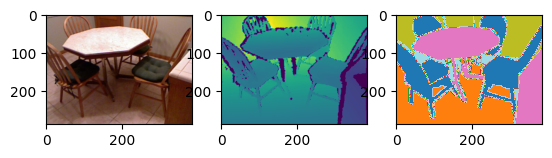

In [22]:
data = next(iter(dataset.dataset))
image, depth_gt, label_gt = data['image'], data['depth'], data['label']

fig, ax = plt.subplots(1, 3)
ax[0].imshow(image)
ax[1].imshow(depth_gt)
ax[2].imshow(label_gt, cmap='tab20')

plt.show()

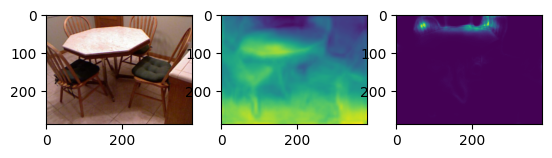

In [46]:
to_tensor = transforms.ToTensor(test=True, maxDepth=10.0)

data = next(iter(dataset.dataset))
data = to_tensor(data)

image, depth_gt, label_gt = data['image'].float(), data['depth'], data['label']

model.eval()

image = image.unsqueeze(0) # shape [channels, w, h]
depth_gt = depth_gt.unsqueeze(0) # shape [1, 1, w, h]
label_gt = label_gt.unsqueeze(0)


depth_pred, seg_pred = model(image)

seg_pred = F.softmax(seg_pred, dim=1)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(image.squeeze(0).permute(1,2,0).numpy())
ax[1].imshow(depth_pred.squeeze(0).detach().permute(1,2,0).numpy())
ax[2].imshow(seg_pred.squeeze(0)[0].detach().permute(0,1).numpy())

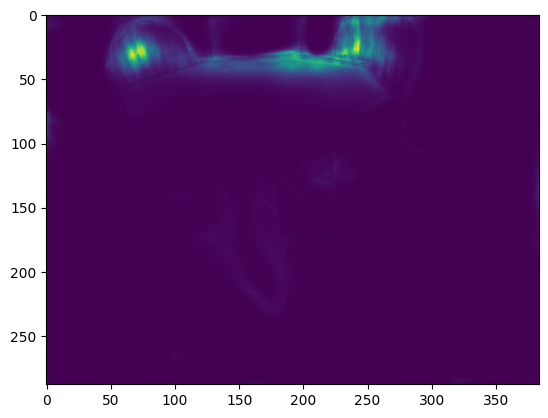

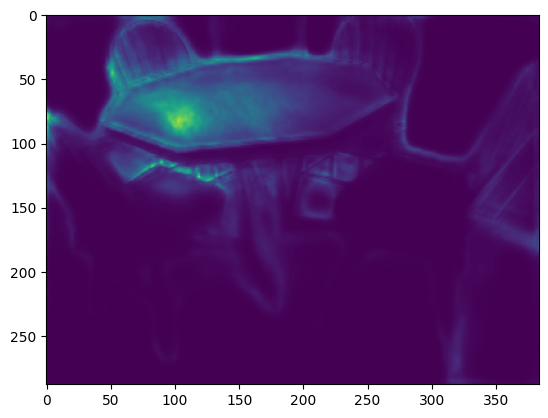

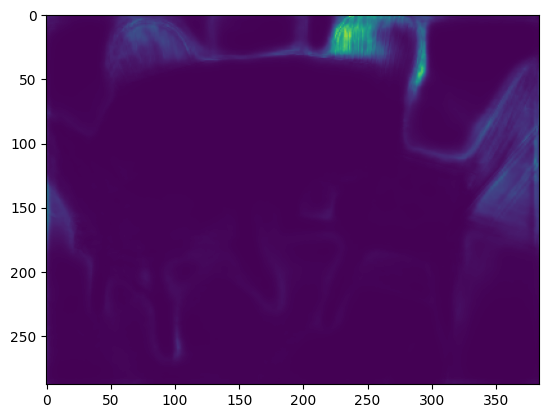

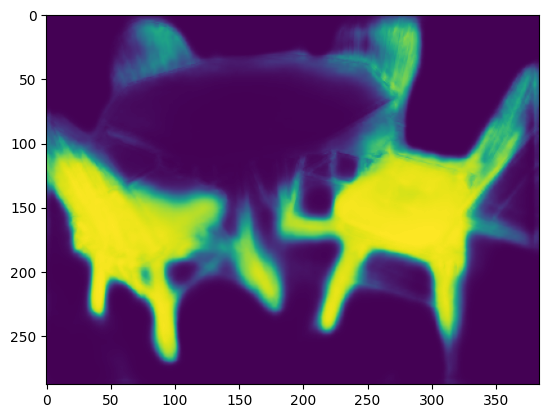

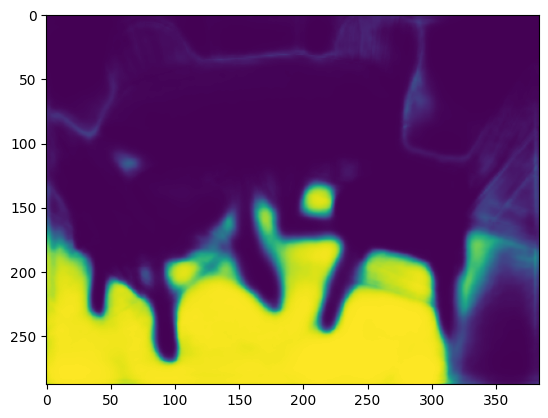

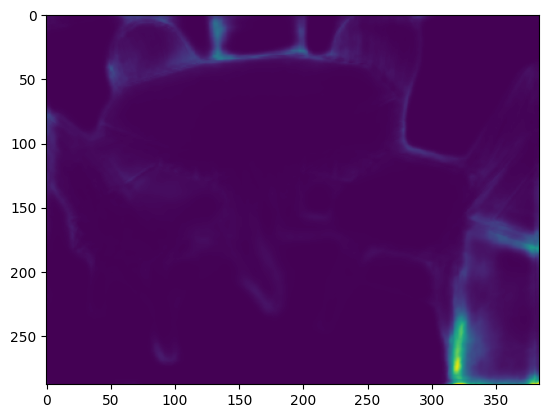

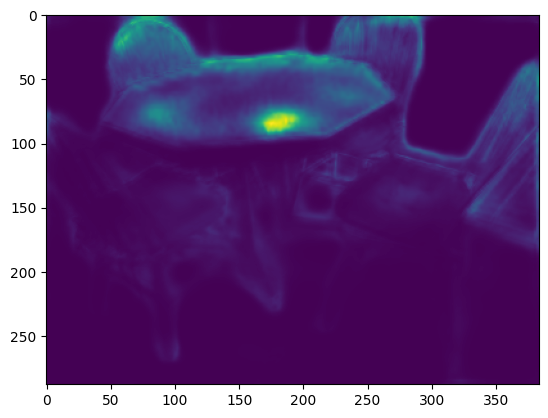

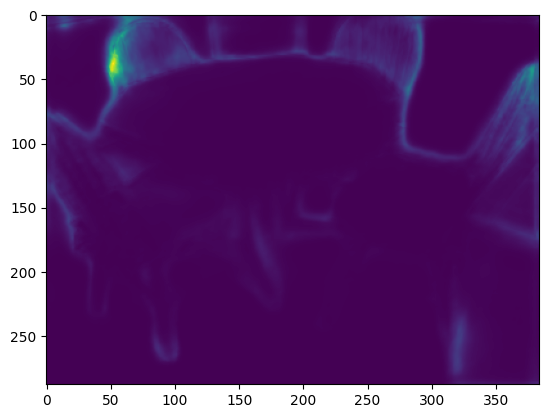

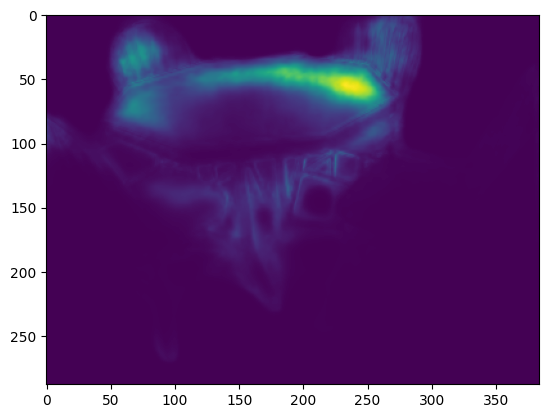

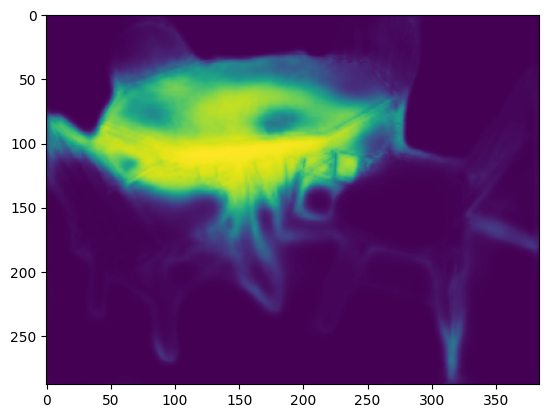

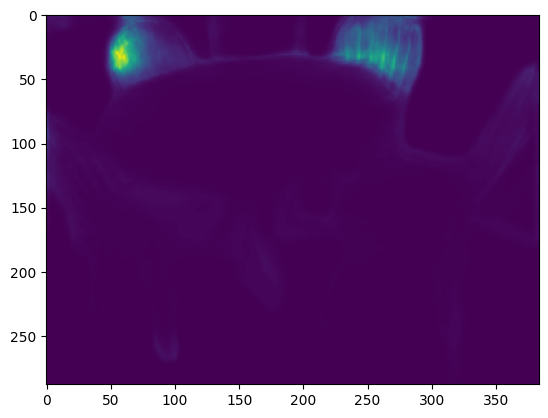

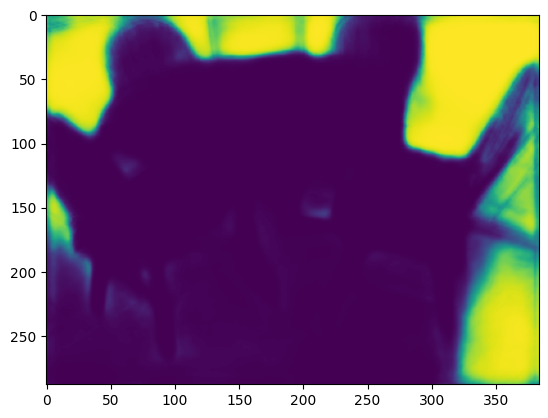

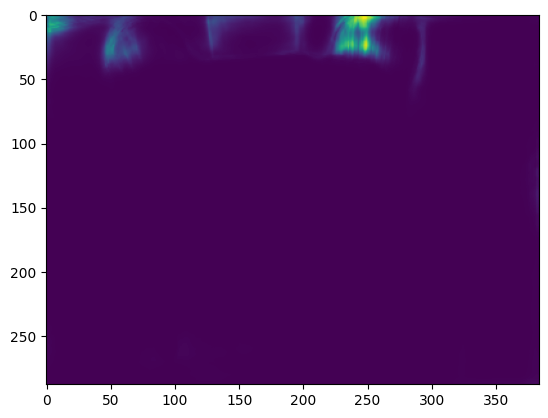

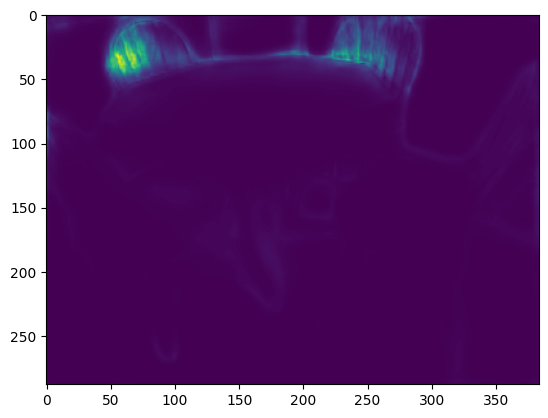

In [47]:
for c in range(seg_pred.size(1)):
    plt.imshow(seg_pred.squeeze(0)[c].detach().permute(0,1).numpy())
    plt.show()